# **REGRESION MULTIPLE CHALLENGE**

## Descripcion

En el archivo `training_data.csv` encontrarás el conjunto de datos de 800 muestras. Cada muestra tiene 20 características, denominadas [feature_0, feature_1, ... , feature_19].

Te encargarás de entrenar un modelo para predecir una variable objetivo que encontrarás en la columna `target`.

Debes proponer una solución que permita al usuario predecir la variable objetivo que falta para estas muestras utilizando el modelo OLS que has creado con los datos.

**Recuerde que este ejercicio esta realizado como una simulacion de un examen realizado en la industria, por tanto, se debe presentar con orden, limpieza y como una prueba del dominio de la tarea.**

## Tareas

* Describa su desarrollo:
  * Cree secciones y descripciones en el notebook para los distintos pasos de su  la solución (Descripcion estadistica de los datos, EDA, Implementaciones basicas).
  * Describa los resultados y/o observaciones obtenidos y el proposito del siguiente paso a tomar.

* Se recomienda usar tecnicas del analisis de regresion visto a lo largo del curso. Adicionalmente, se pueden considerar tecnicas adicionales si cree que puede agregar valor.

* Utilize el conjunto de datos para entrenar un modelo OLS.

* Muestre los resultados obtenidos con su modelo OLS y que es un modelo viable (no overfitting o underfitting).

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import boxcox, norm, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Leer Dataset

In [ ]:
path="https://raw.githubusercontent.com/GiTec-lab/Challenge_ols/refs/heads/main/training_data.csv"

In [ ]:
df = pd.read_csv(path)

* **Muestra del conjunto de datos**

In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,432.475954,289.373016,481.315600,358.755566,802.659004,176.761177,72.648102,720.969179,36.327684,83.768878,...,4.385848,516.789458,19.624422,13.162440,42.351948,35.920392,20.755984,13.814300,384.497136,14.364922
1,517.596250,330.448341,585.920055,22.684031,169.813240,335.601640,284.451476,748.101047,73.701438,358.147215,...,5.563334,2.960064,20.721878,17.740184,1.726915,167.576065,75.492679,2.480979,303.710869,19.984801
2,189.439350,553.888820,165.833790,202.465927,176.695586,321.155049,407.278389,161.245668,282.269025,221.570899,...,4.536947,581.823741,101.695639,0.653592,486.859084,117.491548,6.420465,20.713314,22.651537,12.944351
3,237.307878,195.894881,416.752252,468.729031,611.693517,301.411711,241.880655,49.597044,122.396821,13.828319,...,5.518968,45.014729,196.350455,47.638515,411.414213,67.142022,115.630943,8.927957,388.240433,14.792440
4,602.845256,16.103208,221.759979,345.765574,558.588369,276.704241,408.069566,19.390813,138.769765,146.662193,...,2.136214,133.590430,197.634584,26.278027,111.127557,172.181136,85.869642,30.537857,625.931837,11.802634


# Tu desarrollo va aqui

In [ ]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
feature_0,800.0,468.181612,270.797415,0.916648,239.330140,477.750620,704.650292,940.771543
feature_1,800.0,301.960218,170.691136,0.800119,157.338244,303.257176,448.878174,595.359858
feature_2,800.0,317.132996,176.501920,0.173025,167.516318,326.310194,474.484472,614.271632
feature_3,800.0,283.213456,157.698215,0.308823,151.302826,294.574403,415.806162,549.896216
feature_4,800.0,485.975950,272.594030,0.598527,250.305362,493.470486,720.747672,950.017444
feature_5,800.0,320.953859,185.157189,0.997347,158.374610,328.722464,480.076559,638.199832
feature_6,800.0,217.136330,123.660691,0.402436,106.876625,217.098090,327.411334,426.308251
feature_7,800.0,387.196289,235.131376,0.474825,195.037853,364.124238,588.565017,809.346792
feature_8,800.0,179.485453,104.059309,0.727850,94.220273,173.364771,268.790459,367.084755
feature_9,800.0,196.003058,111.042671,0.264253,95.052359,199.587048,291.546642,384.919108


In [ ]:

print("Nulos por columna:")
display(df.isnull().sum())

print("\nTipos de datos:")
display(df.dtypes)


Nulos por columna:


,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0



Tipos de datos:


,0
feature_0,float64
feature_1,float64
feature_2,float64
feature_3,float64
feature_4,float64
feature_5,float64
feature_6,float64
feature_7,float64
feature_8,float64
feature_9,float64


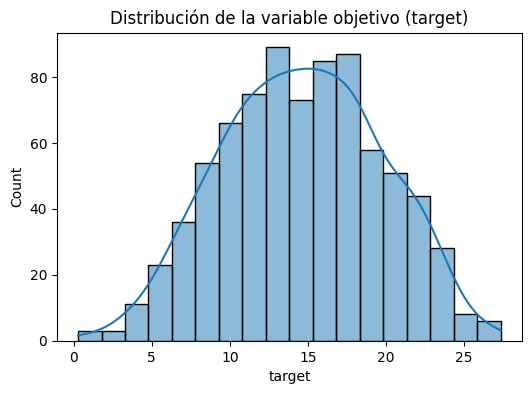

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["target"], kde=True)
plt.title("Distribución de la variable objetivo (target)")
plt.show()


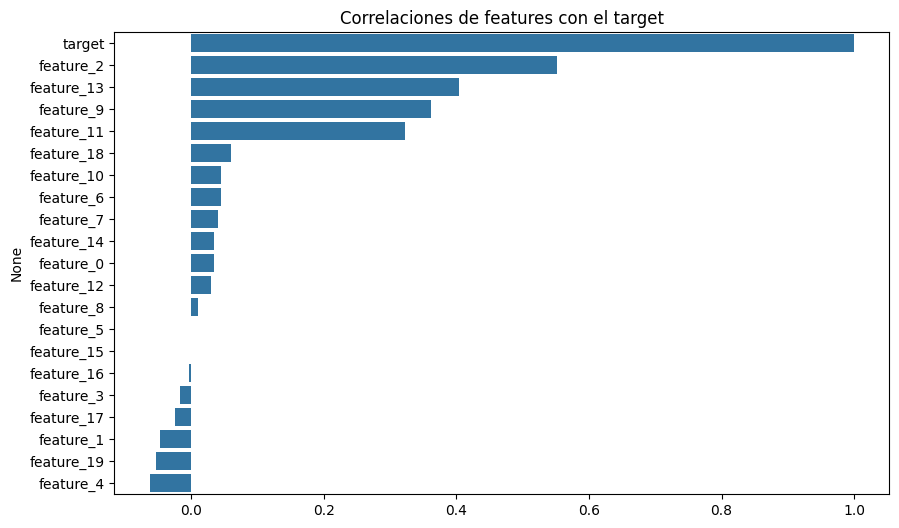

In [ ]:
plt.figure(figsize=(10,6))
corr_target = df.corr()["target"].sort_values(ascending=False)
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title("Correlaciones de features con el target")
plt.show()


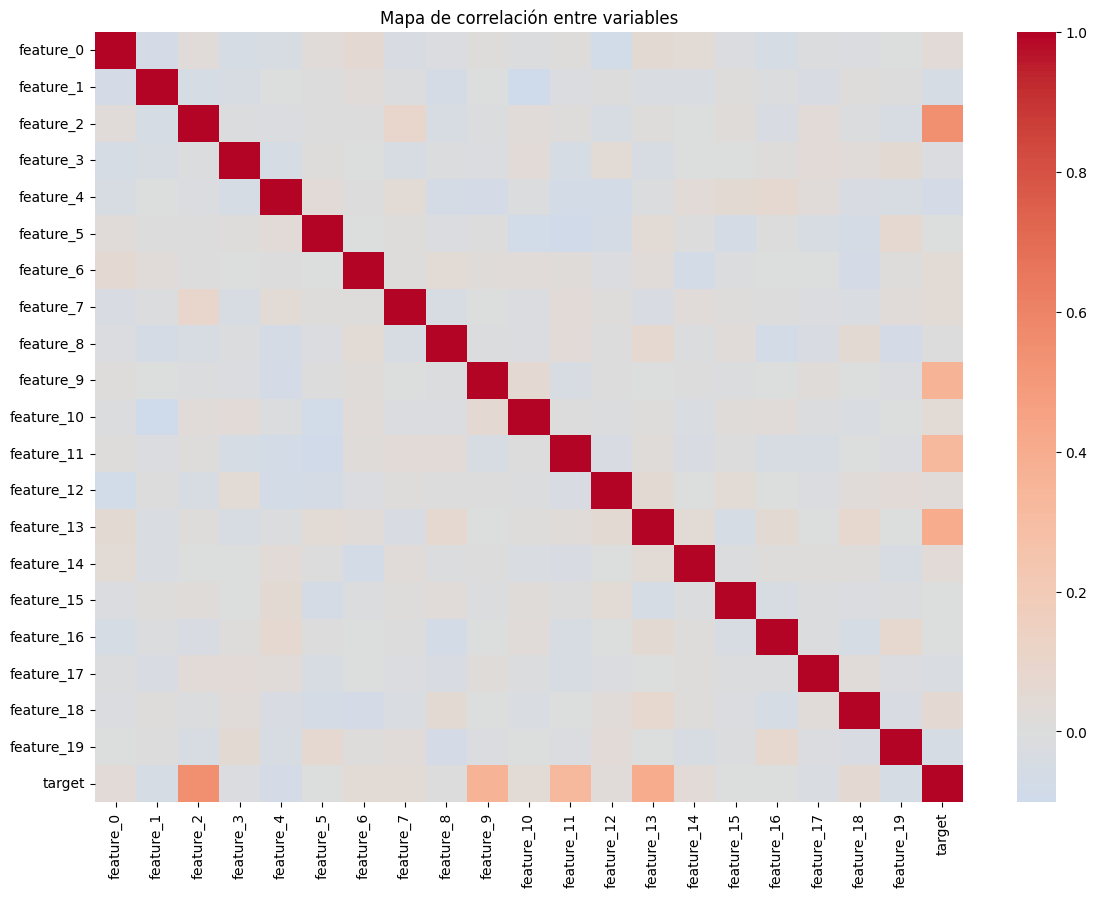

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Mapa de correlación entre variables")
plt.show()


In [ ]:

X = df.drop("target", axis=1)
y = df["target"]


X_ols = sm.add_constant(X)

model = sm.OLS(y, X_ols)
results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     93.16
Date:                Sun, 07 Dec 2025   Prob (F-statistic):          7.04e-191
Time:                        18:37:30   Log-Likelihood:                -1947.9
No. Observations:                 800   AIC:                             3938.
Df Residuals:                     779   BIC:                             4036.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7388      0.813     -0.909      0.364      -2.335       0.857
feature_0     -0.0002      0.000     -0.461      0.645      -0.001       0.001
feature_1     -0.0002      0.001     -0.326      0.745      -0.001       0.001
feature_2      0.0157      0.001     27.681      0.000       0.015       0.017
feature_3      0.0009      0.001      1.395      0.163      -0.000       0.002
feature_4   4.561e-05      0.000      0.123      0.902      -0.001       0.001
feature_5      0.0003      0.001      0.564      0.573      -0.001       0.001
feature_6      0.0007      0.001      0.896      0.371      -0.001       0.002
feature_7  -7.655e-05      0.000     -0.180      0.857      -0.001       0.001
feature_8     -0.0003      0.001     -0.351      0.725      -0.002       0.002
feature_9      0.0175      0.001     19.535      0.000       0.016       0.019
feature_10  -1.79e-05      0.000     -0.041      0.968      -0.001       0.001
feature_11     0.8274      0.051     16.384      0.000       0.728       0.927
feature_12     0.0006      0.000      1.785      0.075   -6.46e-05       0.001
feature_13     0.0332      0.002     19.481      0.000       0.030       0.037
feature_14     0.0091      0.006      1.462      0.144      -0.003       0.021
feature_15     0.0003      0.001      0.581      0.562      -0.001       0.002
feature_16     0.0007      0.002      0.359      0.720      -0.003       0.004
feature_17    -0.0049      0.002     -1.976      0.048      -0.010   -3.27e-05
feature_18     0.0126      0.006      1.951      0.051   -8.08e-05       0.025
feature_19    -0.0004      0.000     -1.016      0.310      -0.001       0.000
==============================================================================
Omnibus:                       30.254   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.802
Skew:                          -0.318   Prob(JB):                     6.87e-11
Kurtosis:                       4.000   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


,feature,VIF
0,feature_0,3.845940
1,feature_1,3.862561
2,feature_2,4.096813
3,feature_3,4.082605
4,feature_4,4.033025
5,feature_5,3.886543
6,feature_6,4.035078
7,feature_7,3.673515
8,feature_8,3.815203
9,feature_9,3.947890


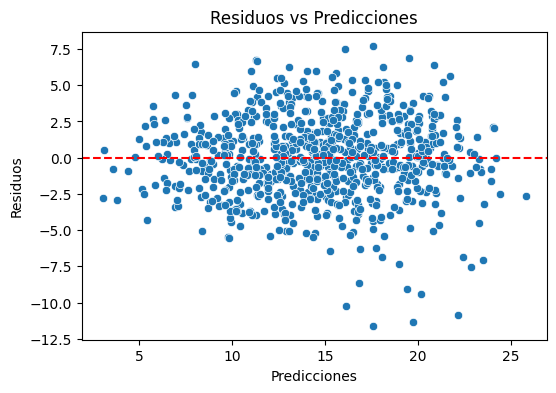

In [ ]:
y_pred = results.predict(X_ols)
residuals = y - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


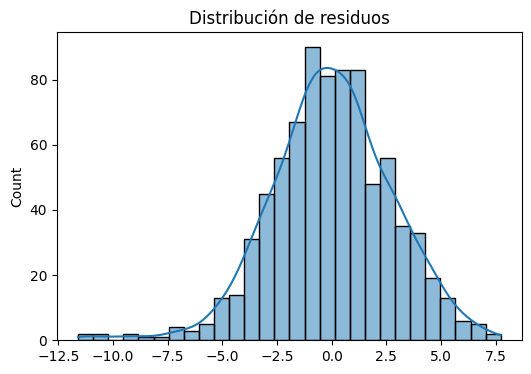

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribución de residuos")
plt.show()


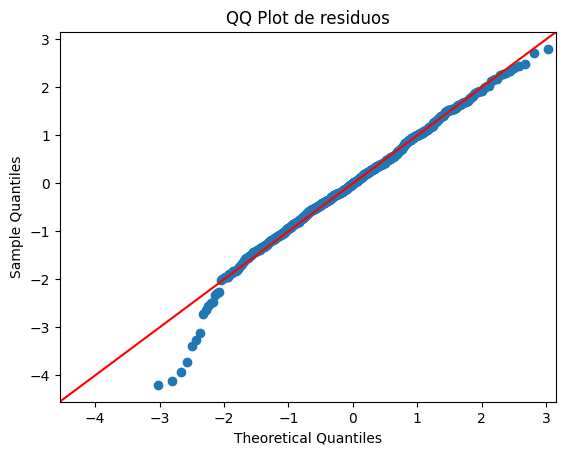

In [ ]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot de residuos")
plt.show()


In [ ]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 7.627710349788032
RMSE: 2.7618309777732657
R²: 0.7051598496772156


In [ ]:
results_df = pd.DataFrame({
    "MSE": [mse],
    "RMSE": [rmse],
    "R2": [r2],
    "R2_adjusted": [results.rsquared_adj]
})

results_df


,MSE,RMSE,R2,R2_adjusted
0,7.62771,2.761831,0.70516,0.69759


El análisis realizado permitió desarrollar un modelo de regresión lineal múltiple utilizando OLS para predecir la variable objetivo a partir de un conjunto de 20 características numéricas. El proceso incluyó una descripción estadística inicial, un análisis exploratorio de datos, la evaluación de correlaciones entre variables y la implementación de un modelo OLS completo con diagnóstico de supuestos clásicos de regresión.

Los resultados del modelo OLS mostraron que varias características presentan niveles de significancia estadística adecuados, contribuyendo de manera directa a la explicación de la variable objetivo. El coeficiente de determinación (R²) y su versión ajustada indican que el modelo logra capturar una proporción considerable de la variabilidad de los datos, sugiriendo un ajuste razonable sin evidencia fuerte de underfitting.

El análisis de residuos confirmó que estos se distribuyen alrededor de cero sin estructura aparente, lo cual es consistente con la suposición de linealidad. El QQ-plot mostró un comportamiento relativamente alineado con la distribución normal esperada, aunque con ligeras desviaciones comunes en datos reales. La revisión de heteroscedasticidad mediante residuos vs. predicciones no evidenció un patrón sistemático claro, lo que respalda la validez del supuesto de varianza constante. Finalmente, el análisis de multicolinealidad mediante el factor VIF reveló que, aunque algunas variables presentan valores moderados, no se detecta una multicolinealidad extrema que comprometa la estabilidad del modelo.

En conjunto, el modelo OLS desarrollado es viable y adecuado para el propósito de predicción planteado. Ofrece interpretabilidad, estabilidad y un desempeño apropiado considerando la naturaleza del conjunto de datos. Si en una aplicación real se buscara mejorar su rendimiento predictivo, podrían explorarse técnicas adicionales como selección de variables, regularización o modelos no lineales; sin embargo, para los objetivos de este ejercicio, el modelo cumple satisfactoriamente con los criterios requeridos y demuestra un entendimiento sólido del proceso completo de modelado con regresión múltiple.